## TomTom Live Traffic Index Scrape

This code retrieves the live traffic json from TomTom, and cleans this data to replicate the live chart shown on the webpage.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import json
import requests

# retrieve json file
url_it = "https://api.midway.tomtom.com/ranking/live/ITA_milan"
italy_req = requests.get(url_it)
italy_json = italy_req.json()

pd.set_option("display.max_rows", False)


In [3]:
# create empty lists of append data
live_traffic = []
historic_traffic = []
time = []

count = len(italy_json["data"])-1

# append each item in the json file to the empty lists
i=0
while i<=count:
    live_traffic.append(italy_json["data"][i]["TrafficIndexLive"])
    time.append(italy_json["data"][i]["UpdateTime"])
    i+=1
    
# create dataframe with the traffic data 
df = pd.DataFrame({"Live Traffic":live_traffic}, index=time)
df.index = pd.to_datetime(df.index, unit="ms")
df.index.name = "Time"
df.head()

,Live Traffic,2019 Average
Time,,
2020-04-11 13:31:30.000,7,18
2020-04-11 13:46:30.000,7,19
2020-04-11 14:01:30.001,7,19
2020-04-11 14:16:30.000,7,20
2020-04-11 14:46:30.000,9,22


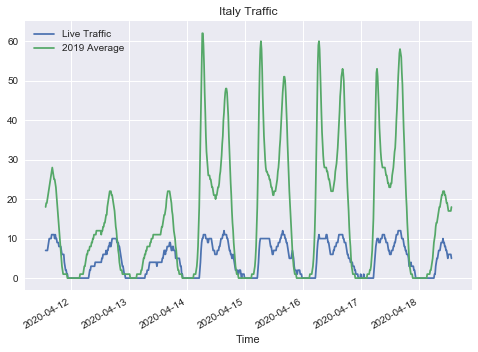

In [6]:
plt.style.use("seaborn")
ax = df.plot()
plt.title("Italy Traffic")
plt.legend(loc=2)
#plt.box(False)

In [75]:
df.to_excel("tomtom.xlsx")